# Problem Set 6 Naïve Bayes

In [42]:
#!pip install nltk
import pandas as pd
import numpy as np
import seaborn as sns 
import nltk
from nltk.stem import PorterStemmer

## 1.

### 1.

In [2]:
email = pd.read_csv("../data/lingspam-emails.csv.bz2", sep = '\t')
email = email.drop("files", axis=1)
email['spam'] = email['spam'].astype('str') 
email['message'] = email['message'].astype('str') 
email.head()

,spam,message
0,False,Subject: re : 2 . 882 s - > np np > date : su...
1,False,Subject: s - > np + np the discussion of s - ...
2,False,Subject: 2 . 882 s - > np np . . . for me it ...
3,False,"Subject: gent conference "" for the listserv ""..."
4,False,Subject: query : causatives in korean could a...


In [3]:
email.shape

(2893, 2)

In [4]:
sum(email['spam'].isna())

0

In [5]:
sum(email['message'].isna())

0

In [6]:
onlySpam = email[(email['spam'] == 'True')]
noSpam = email[(email['spam'] == 'False')]
onlySpam.head(20)

,spam,message
241,True,Subject: great part-time or summer job ! * * ...
242,True,Subject: auto insurance rates too high ? dear...
243,True,Subject: do want the best and economical hunti...
244,True,Subject: email 57 million people for $ 99 57 ...
245,True,Subject: do n't miss these ! attention ! warn...
246,True,Subject: see amazing world record sex ! atten...
247,True,Subject: we can help you get a loan ! ! ! sub...
248,True,Subject: beat the irs & pay-no - more = = = =...
249,True,Subject: email 57 million people for $ 99 57 ...
250,True,Subject: make $ 3500 per week using your hom...


### 2.

In [7]:
from sklearn.feature_extraction.text import CountVectorizer
vrizer = CountVectorizer(binary=True)
# define vectorizer
X = vrizer.fit_transform(email.message)
# vectorize your data. Note: this creates a sparse matrix,
# use .toarray() if you run into trouble
vocabulary = vrizer.get_feature_names()
# in case you want to see what are the actual words
DTM = pd.DataFrame(X.toarray(), columns = vrizer.get_feature_names_out())
DTM

/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,00,000,0000,00001,00003000140,00003003958,00007,0001,00010,00014,...,zwischen,zwitserlood,zxgah7qabjh,zybatov,zybatow,zygmunt,zyokyoozyu,zytkow,zz214,zzlsa
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2888,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2889,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2890,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2891,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
len(DTM.columns)

60925

In [9]:
DTM.shape

(2893, 60925)

There are 2893 emails, and there are 60925 different 'words' in the DTM, however some are just jibberish and/or numbers.

### 3.

In [10]:
from sklearn.model_selection import train_test_split
X = DTM
y = (email.spam)
Xt, Xv, yt, yv, = train_test_split(X, y, test_size=0.2)

### 4.

PrS1 will mean probability that the email is spam, with PrS0 being non-spam. PrW1ViagraS1 Will be what the conditional probabilities look like, in this case, the probability that the word is contained given the email is spam. LogPrW1 will be the log probability that the word is present. lPrS1W will be the log-likelyhood of the email being spam, given vector of words it contains.


## 2. Naive Bayes

### 1.

In [11]:
for i in range(40042,40047):
    print(DTM.iloc[:,i].name)

nootka
nope
nor
nora
norbert


- a. The rows correspond to emails at index 983-985
- b. The columns correspond with the words: nootka, nope, nor, nora, norbert
- c. The 1's mean the word is present in the given email
- d. The zeros mean the word is not present in the given email

### 2.

0.83

### 3.

In [12]:
yyt = pd.DataFrame(data=yt) 
yytS = yyt[(yyt['spam'] == 'True')]
yyt['spam'] = np.where(yyt['spam'] == 'True', 1 ,0)
PrS1f = yyt.mean()
PrS1 = PrS1f[0]
PrS0 = 1-PrS1
LogPrS1 = np.log(PrS1)
LogPrS0 = np.log(PrS0)
print('Log S1:', LogPrS1, '\n', 'Log S0:', LogPrS0)

Log S1: -1.796090355165895 
 Log S0: -0.1814576258546907


### 4.

In [13]:
yyt['spam'].values

array([0, 0, 1, ..., 0, 0, 0])

In [14]:
b1 = Xt[yyt['spam'].values==1]

In [15]:
spamOnly = b1[b1['spam'] == 1]
noSpamOnly = b1[b1['spam'] == 0]

In [16]:
SpamW1Vec = []
for column in spamOnly:
    SpamW1Vec.append(np.log(spamOnly[column].mean()))
NoSpamW1Vec = []
for column in noSpamOnly:
    NoSpamW1Vec.append(np.log(noSpamOnly[column].mean()))

/tmp/ipykernel_361/2993333793.py:3: RuntimeWarning: divide by zero encountered in log
  SpamW1Vec.append(np.log(spamOnly[column].mean()))
/tmp/ipykernel_361/2993333793.py:6: RuntimeWarning: divide by zero encountered in log
  NoSpamW1Vec.append(np.log(noSpamOnly[column].mean()))


### 5.
The length of the vectors should be the same as how many words there are in their respective DTM's, as it is getting the average number of 1's from each column.

### 6.

In [17]:
Xv.shape

(579, 60925)

In [18]:
lS1W1 = Xv @(np.array(SpamW1Vec)) + LogPrS1
lS0W1 = Xv @(np.array(NoSpamW1Vec)) + LogPrS0

### 7.
You have to compute the log-likelyhood for each word in the DTM, and then for spam=1 and spam=0. This comes out to around 68,000 log-likelyhoods

### 8.

In [19]:
prediction = lS1W1 > lS0W1

In [20]:
len(prediction)

579

In [21]:
prediction

776     False
792     False
2806    False
1294    False
1908    False
        ...  
47      False
1911    False
506     False
2641    False
2234    False
Length: 579, dtype: bool

### 9.

In [22]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
nyv = yv.to_frame()
nyv['spam'] = np.where(nyv['spam'] == 'True', 1 ,0)
predictions = prediction.to_frame()
predictions[0] = np.where(predictions[0] == 'True', 1 ,0)
cm = confusion_matrix(nyv,predictions, labels=[1,0])
print(cm)
print("Accuracy:",accuracy_score(nyv, predictions))


[[  0  97]
 [  0 482]]
Accuracy: 0.8324697754749568


### 10.

This model isn't the best because we can't base our prediction on a single observation
of a single word, while ignoring everything else in the message, and claim we are 100%
certain in our conclusion. Replacing likelihood by log-likelihood only shifts
the problem from zero-likelihood to minus-infinity-log-likelihood and does not offer
any solution.

## 3. Add smoothing
### 1.

In [33]:
def fittingS1(a):
    yyt = pd.DataFrame(data=yt) 
    yytS = yyt[(yyt['spam'] == 'True')]
    yyt['spam'] = np.where(yyt['spam'] == 'True', 1 ,0)
    PrS1f = (yyt.sum()+a)/(len(yyt)+2*a)
    PrS1 = PrS1f[0]
    PrS0 = 1-PrS1
    LogPrS1 = np.log(PrS1)
    LogPrS0 = np.log(PrS0)
    b1 = Xt[yyt['spam'].values==1]
    spamOnly = b1[b1['spam'] == 1]
    SpamW1Vec = []
    for column in spamOnly:
        SpamW1Vec.append(np.log((spamOnly[column].sum()+a)/(len(spamOnly[column])+2*a)))
    lS1W1 = Xv @(np.array(SpamW1Vec)) + LogPrS1
    return lS1W1

def fittingS0(a):
    yyt = pd.DataFrame(data=yt) 
    yytS = yyt[(yyt['spam'] == 'True')]
    yyt['spam'] = np.where(yyt['spam'] == 'True', 1 ,0)
    PrS1f = (yyt.sum()+a)/(len(yyt)+2*a)
    PrS1 = PrS1f[0]
    PrS0 = 1-PrS1
    LogPrS1 = np.log(PrS1)
    LogPrS0 = np.log(PrS0)
    b1 = Xt[yyt['spam'].values==1]
    noSpamOnly = b1[b1['spam'] == 0]
    NoSpamW1Vec = []
    for column in noSpamOnly:
        NoSpamW1Vec.append(np.log((noSpamOnly[column].sum()+a)/(len(noSpamOnly[column])+2*a)))
    lS0W1 = Xv @(np.array(NoSpamW1Vec)) + LogPrS0
    return lS0W1

def validation(c,d):
    prediction = c > d
    nyv = np.where(yv == 'True', 1 ,0)
    prediction = np.where(prediction == True, 1 ,0)
    cm = confusion_matrix(nyv,prediction, labels=(1,0))
    print(cm)
    print("Accuracy:",accuracy_score(nyv, prediction))
    return(accuracy_score(nyv, prediction))

### 2.

In [24]:
oneS1 = fittingS1(0.2)
oneS0 = fittingS0(0.2)

In [25]:
print(oneS1,oneS0)

776    -2257.370342
792    -1125.554079
2806    -386.466786
1294   -1469.892763
1908    -783.472614
           ...     
47      -218.886044
1911    -314.297474
506    -3720.517660
2641    -147.318251
2234   -2530.866393
Length: 579, dtype: float64 776    -3111.302716
792    -1430.542325
2806    -518.490618
1294   -2033.424843
1908    -996.087865
           ...     
47      -294.637078
1911    -428.315766
506    -5274.175855
2641    -188.046978
2234   -3378.060459
Length: 579, dtype: float64


### 3.

In [34]:
# For the 0.2 smoothing used above
validation(oneS1,oneS0)

[[ 94   3]
 [482   0]]
Accuracy: 0.16234887737478412


0.16234887737478412

In [27]:
twoS1 = fittingS1(0.01)
twoS0 = fittingS0(0.01)

In [28]:
validation(twoS1,twoS0)

[[ 34  63]
 [463  19]]
Accuracy: 0.09153713298791019


In [29]:
threeS1 = fittingS1(0.000001)
threeS0 = fittingS0(0.000001)
validation(threeS1,threeS0)

[[  5  92]
 [ 30 452]]
Accuracy: 0.7892918825561313


### 4.

In [36]:
lst = [0.0000001,0.000001,0.00001,0.0001,0.001,0.01,0.1]
graph = [];
for i in lst:
    e = fittingS1(i)
    m = fittingS0(i)
    print(i,'\n')
    graph.append(validation(e,m))

1e-07 

[[  5  92]
 [ 19 463]]
Accuracy: 0.8082901554404145
1e-06 

[[  5  92]
 [ 30 452]]
Accuracy: 0.7892918825561313
1e-05 

[[  5  92]
 [ 45 437]]
Accuracy: 0.7633851468048359
0.0001 

[[  5  92]
 [ 97 385]]
Accuracy: 0.6735751295336787
0.001 

[[ 13  84]
 [262 220]]
Accuracy: 0.40241796200345425
0.01 

[[ 34  63]
 [463  19]]
Accuracy: 0.09153713298791019
0.1 

[[ 84  13]
 [482   0]]
Accuracy: 0.14507772020725387


### 5.

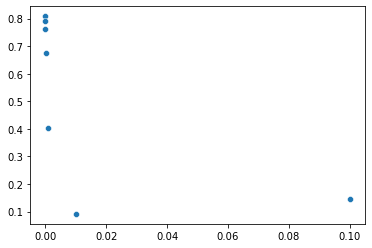

In [48]:
sns.scatterplot(x = lst, y = graph)
plt.autoscale()
plt.show()

## 4. Interpretation

### 1.

In [60]:
best = [a - b for a, b in zip(SpamW1Vec, NoSpamW1Vec)]
best = np.asarray(best)
best = best[best > -100000]
best = best[best < 100000]
np.argmax(best)

/tmp/ipykernel_361/1303396079.py:1: RuntimeWarning: invalid value encountered in double_scalars
  best = [a - b for a, b in zip(SpamW1Vec, NoSpamW1Vec)]


1579

In [67]:
print("The most likely spam word is:",Xt.iloc[:,1579].name)

The most likely spam word is: 200f


### 2.

In [95]:
small

array([ 408,  692, 1641, 1546, 2101,  720, 1123,  396, 1140,   28])

In [94]:
large = np.argsort(-best)[:10]
small = np.argsort(-best)[-10:]
for i in large:
    print("The 10 most likely spam words are:",Xt.iloc[:,i].name)
for i in small:
    print("The 10 least likely spam words are:",Xt.iloc[:,i].name)

The 10 most likely spam words are: 200f
The 10 most likely spam words are: 2661
The 10 most likely spam words are: 161d
The 10 most likely spam words are: 12420
The 10 most likely spam words are: 0761
The 10 most likely spam words are: 192832
The 10 most likely spam words are: 0733
The 10 most likely spam words are: 0998
The 10 most likely spam words are: 25
The 10 most likely spam words are: 1700
The 10 least likely spam words are: 0930
The 10 least likely spam words are: 1197
The 10 least likely spam words are: 20742
The 10 least likely spam words are: 1sb
The 10 least likely spam words are: 273275
The 10 least likely spam words are: 1205
The 10 least likely spam words are: 167
The 10 least likely spam words are: 0897
The 10 least likely spam words are: 1693
The 10 least likely spam words are: 0030


Spent about 15 hours on this PS

## 5.